<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [11]:
boston_df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


<h2>Task 1: Become Familiar with the dataset

In [12]:
print(boston_df.head())
print(boston_df.describe())
print(boston_df.info())

   Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  \
0           0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0   
1           1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0   
2           2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0   
3           3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0   
4           4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0   

     TAX  PTRATIO  LSTAT  MEDV  
0  296.0     15.3   4.98  24.0  
1  242.0     17.8   9.14  21.6  
2  242.0     17.8   4.03  34.7  
3  222.0     18.7   2.94  33.4  
4  222.0     18.7   5.33  36.2  
       Unnamed: 0        CRIM          ZN       INDUS        CHAS         NOX  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean   252.500000    3.613524   11.363636   11.136779    0.069170    0.554695   
std    146.213884    8.601545   23.322453    6.860353    0.253994    0.115878   
min      

<h2>Task 2: Generate Descriptive Statistics and Visualizations

Median value of owner-occupied homes

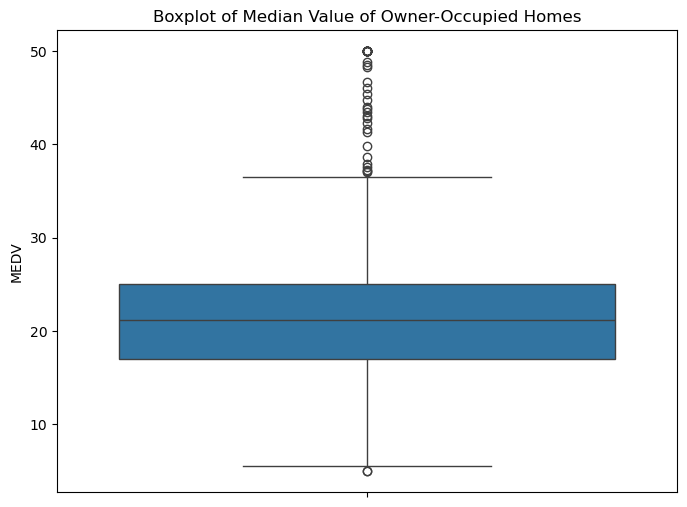

In [13]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=boston_df['MEDV'])
plt.title("Boxplot of Median Value of Owner-Occupied Homes")
plt.show()

Bar plot for Charles River variable

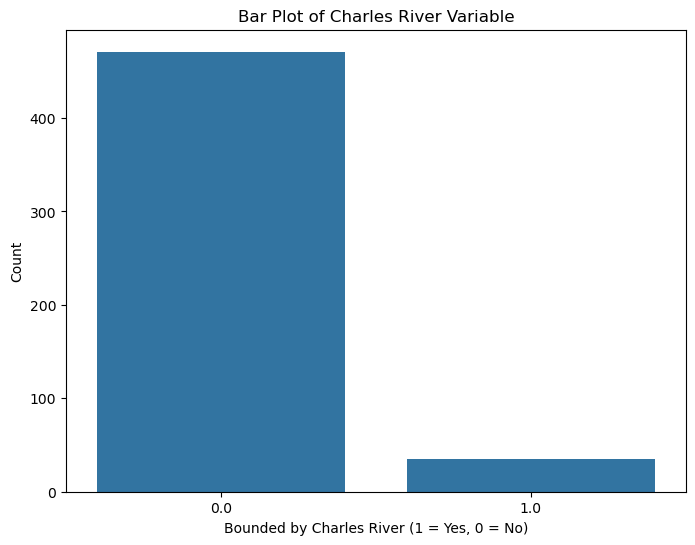

In [14]:
plt.figure(figsize=(8, 6))
sns.countplot(x=boston_df['CHAS'])
plt.title("Bar Plot of Charles River Variable")
plt.xlabel("Bounded by Charles River (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()

Bar plot for MEDV vs Age

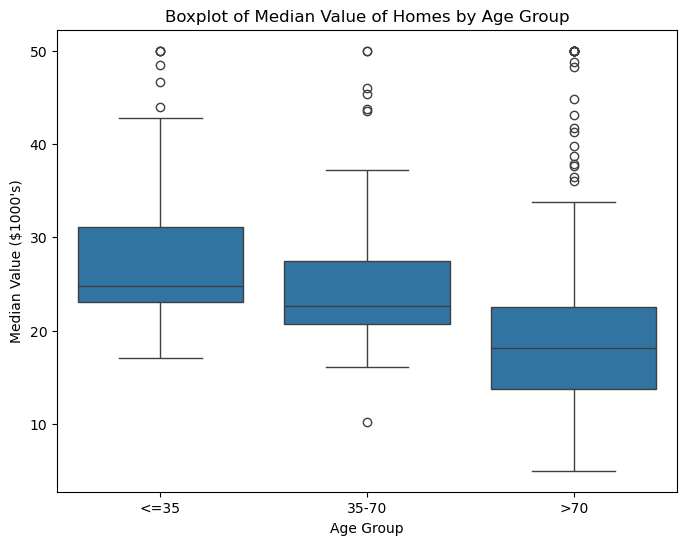

In [15]:
boston_df['AGE_GROUP'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=["<=35", "35-70", ">70"])
plt.figure(figsize=(8, 6))
sns.boxplot(x=boston_df['AGE_GROUP'], y=boston_df['MEDV'])
plt.title("Boxplot of Median Value of Homes by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Median Value ($1000's)")
plt.show()


Scatter plot for NOX vs. INDUS

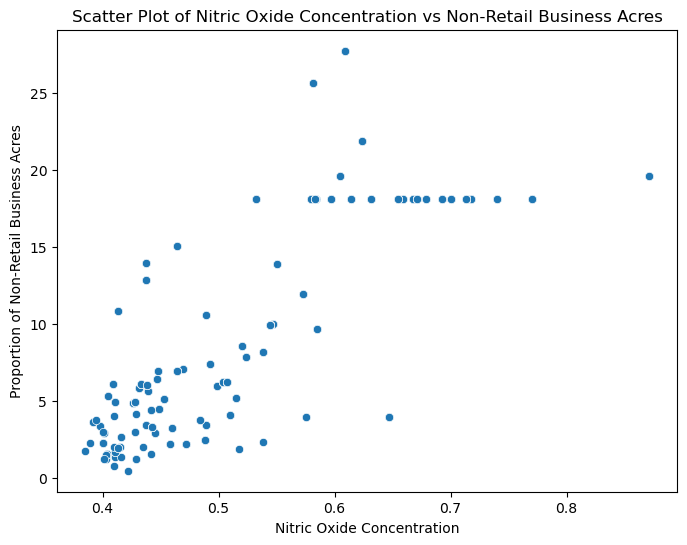

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=boston_df['NOX'], y=boston_df['INDUS'])
plt.title("Scatter Plot of Nitric Oxide Concentration vs Non-Retail Business Acres")
plt.xlabel("Nitric Oxide Concentration")
plt.ylabel("Proportion of Non-Retail Business Acres")
plt.show()

Histogram for PTRATIO

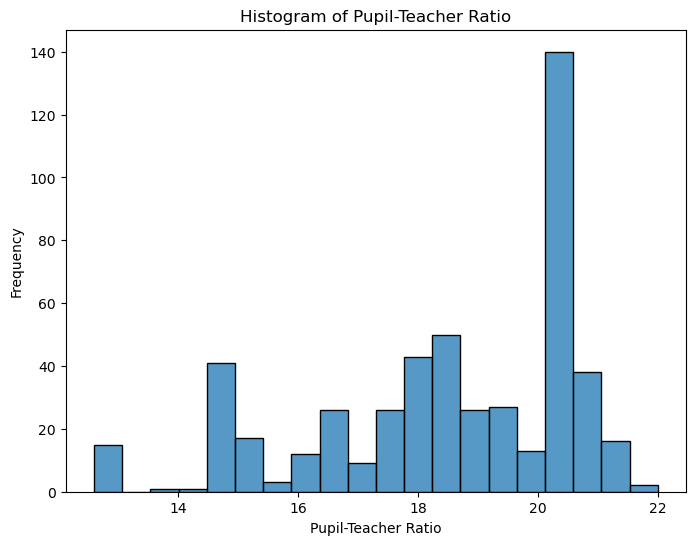

In [17]:
plt.figure(figsize=(8, 6))
sns.histplot(boston_df['PTRATIO'], bins=20)
plt.title("Histogram of Pupil-Teacher Ratio")
plt.xlabel("Pupil-Teacher Ratio")
plt.ylabel("Frequency")
plt.show()

<h2>Task 3: Statistical Tests</h2>

T-test for median value of houses bounded by the Charles River

In [18]:
chas1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
chas0 = boston_df[boston_df['CHAS'] == 0]['MEDV']
t_stat, p_value = stats.ttest_ind(chas1, chas0)
print(f"T-test result for CHAS: t-statistic = {t_stat}, p-value = {p_value}")

T-test result for CHAS: t-statistic = 3.996437466090509, p-value = 7.390623170519905e-05


ANOVA for MEDV across AGE groups

In [19]:
anova_model = ols('MEDV ~ C(AGE_GROUP)', data=boston_df).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)
print("ANOVA result for AGE_GROUP:")
print(anova_table)

ANOVA result for AGE_GROUP:
                    sum_sq     df         F        PR(>F)
C(AGE_GROUP)   5401.731883    2.0  36.40765  1.710501e-15
Residual      37314.563532  503.0       NaN           NaN


Pearson Correlation for NOX vs INDUS

In [20]:
correlation, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(f"Pearson Correlation between NOX and INDUS: r = {correlation}, p-value = {p_value}")


Pearson Correlation between NOX and INDUS: r = 0.763651446920915, p-value = 7.913361061241167e-98


Regression Analysis for DIS impact on MEDV

In [21]:
regression_model = ols('MEDV ~ DIS', data=boston_df).fit()
print(regression_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 28 Jan 2025   Prob (F-statistic):           1.21e-08
Time:                        13:25:53   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.3901      0.817     22.499      0.0